<h2>
    Gap-filling on GPS data sets using iterative EOF and time series analysis
</h2>
    <h4>This for the NorthEast_NZ2009.csv data set.<br></h4>
    Libraries used-<br>
    numpy<br>
    pandas<br>
    os <br>
    matplotlib <br>
    eofs.standard <br>
    random <br><br>
    An iterative algorithm, EOF analysis, has been suggested the retrieve the missing values in CGPS data. Using the data, we first construct a spatial-temporal matrix. The missing values are then initialized appropriately. The method then decomposes the constructed matrix into different EOF modes. The optimum number of EOF modes are selected such that we are able to cover maximum variability in the data. The matrix is reconstructed using the number of modes calculated. An iterative update of missing values is performed, which gives the best estimate of missing data points. To verify the correctness of this method, 1-2% of the given data has been used as the cross-validation-set, to see if the missing values can be estimated correctly or not.

In [20]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from eofs.standard import Eof 
import random

In [21]:
df=pd.read_csv('NorthEast_NZ2009.csv', sep=',',header=None)       # reading the .csv files and converting to dataframe
east_matrix = np.array(df.to_numpy())                        #convert to numpy array
east_matrix = east_matrix.T                        # take transpose
m = len(east_matrix)                        #rows
n = len(east_matrix[0])                     #columns
east_matrix = np.nan_to_num(east_matrix)    #fill NaN with 0
org_matrix=east_matrix                        #store the current matrix as org_matrix
print(east_matrix)
print(m)
print(n)

[[  1.47  -5.35  -0.96 ...   5.57   2.61  -5.04]
 [  0.     0.     0.   ...   0.29   0.28  -5.88]
 [ -5.34   2.96  -1.21 ...  -4.83   6.35   1.54]
 ...
 [  0.     0.     0.   ... 103.89  96.31  90.32]
 [  0.     0.     0.   ...   5.31   1.7   -5.41]
 [  0.     0.     0.   ... -13.32 -14.3  -19.2 ]]
99
4291


In [22]:
l=[]
for j in range(n):
    sum=0.0
    count=0
    for i in range(m):
        sum+=east_matrix[i][j]
        count+=1
    sum/=count
    l.append(sum)
    for i in range(m):
        if(east_matrix[i][j]!=0):
            east_matrix[i][j]-=sum

In [23]:
"""
Example of reconstructing the matrix using 20 components
"""
solver = Eof(east_matrix) 
components=20
pcs=solver.pcs(pcscaling = 0 , npcs=components)
eofs=solver.eofs(eofscaling = 0, neofs=components)
new_matrix = np.matmul(pcs,eofs)  
print(new_matrix)

[[  1.99895176   1.84545488   2.37034584 ... -14.8750036  -18.1471274
  -17.18970071]
 [  1.63121363   1.96742441   2.44530865 ... -16.00908848 -16.01687701
  -15.89751743]
 [  2.92940216   7.97051495   5.06703735 ... -13.42900833 -13.48200163
  -10.99701676]
 ...
 [  4.0244773    4.58334715   2.44013813 ...  86.02534593  82.06967177
   80.65130968]
 [  3.38115953   4.2020973    3.53658785 ... -11.52344425 -13.49892726
  -13.3571793 ]
 [  3.50377415   2.55169855   3.00587158 ... -30.27037236 -27.5445624
  -28.20781796]]


In [24]:
eigenvalues =  solver.varianceFraction()
eigenvalue1 = solver.varianceFraction(neigs=99)

In [25]:
print(eigenvalue1.shape) #shape of numpy array for 99 components

(99,)


In [26]:
sum=0.0
for i in range(len(eigenvalue1)):
    sum+=eigenvalue1[i]
print(sum)   #total variance- will be 1.00

1.0


In [27]:
"""
finding the % of variance explained by each component 
"""
for i in range(len(eigenvalue1)):  
    eigenvalue1[i]*=100
    eigenvalue1[i]/=sum
x=np.round(eigenvalue1,decimals=3)
print(x) # 10 components seems to be enough to cover the variance

[9.7939e+01 7.9600e-01 2.0200e-01 1.2800e-01 8.0000e-02 7.4000e-02
 6.6000e-02 6.0000e-02 5.0000e-02 3.9000e-02 3.6000e-02 3.2000e-02
 2.9000e-02 2.6000e-02 2.4000e-02 2.3000e-02 1.9000e-02 1.8000e-02
 1.6000e-02 1.5000e-02 1.3000e-02 1.3000e-02 1.2000e-02 1.2000e-02
 1.1000e-02 1.0000e-02 1.0000e-02 9.0000e-03 9.0000e-03 9.0000e-03
 8.0000e-03 8.0000e-03 8.0000e-03 7.0000e-03 7.0000e-03 7.0000e-03
 7.0000e-03 6.0000e-03 6.0000e-03 6.0000e-03 6.0000e-03 5.0000e-03
 5.0000e-03 5.0000e-03 5.0000e-03 5.0000e-03 5.0000e-03 4.0000e-03
 4.0000e-03 4.0000e-03 4.0000e-03 4.0000e-03 4.0000e-03 4.0000e-03
 3.0000e-03 3.0000e-03 3.0000e-03 3.0000e-03 3.0000e-03 3.0000e-03
 3.0000e-03 3.0000e-03 3.0000e-03 3.0000e-03 3.0000e-03 3.0000e-03
 3.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03
 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03
 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03
 2.0000e-03 2.0000e-03 2.0000e-03 1.0000e-03 1.0000e-03 1.0000

5.011366517683724


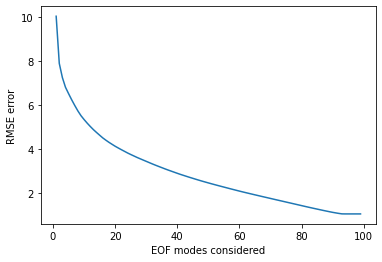

In [28]:
"""
plotting the RMSE error vs the number of EOF modes considered
"""
x_components=[]
y_error=[]
for k in range(99):
    totalerror=0.0
    pcs=solver.pcs(pcscaling = 0 , npcs=k+1)
    eofs=solver.eofs(eofscaling = 0, neofs=k+1)
    new_matrix = np.matmul(pcs,eofs)  
    for i in range(m):
        for j in range(n):
            totalerror+=(east_matrix[i][j]-new_matrix[i][j])**2
    x_components.append(k+1)
    y_error.append((totalerror/(m*n))**0.5)
plt.xlabel("EOF modes considered")
plt.ylabel("RMSE error")
plt.plot(x_components,y_error)
print(y_error[11])            #error for 12 components

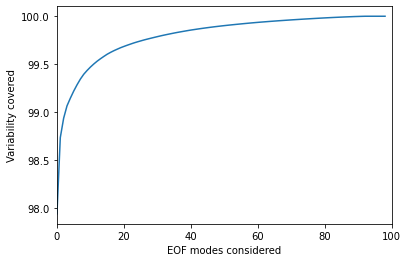

In [29]:
"""
plotting the variance expressed vs the no. of EOF modes considered
"""
variance_covered=0.0
y=[]
x=[]
for i in range(99):
    variance_covered+=eigenvalue1[i]
    y.append(variance_covered)
    x.append(i)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
scale_factor=100
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.xlabel("EOF modes considered")
plt.ylabel("Variability covered")
plt.plot(x,y)
#plot of variance covered v/s the number of components taken. we see graph flats out at approx 10-15 components.
#so we'll fix number of components to 12

In [30]:
print(east_matrix)

[[  4.47171717  -2.85212121   4.41575758 ...  -8.94040404 -12.50494949
  -15.55424242]
 [  0.           0.           0.         ... -14.22040404 -14.83494949
  -16.39424242]
 [ -2.33828283   5.45787879   4.16575758 ... -19.34040404  -8.76494949
   -8.97424242]
 ...
 [  0.           0.           0.         ...  89.37959596  81.19505051
   79.80575758]
 [  0.           0.           0.         ...  -9.20040404 -13.41494949
  -15.92424242]
 [  0.           0.           0.         ... -27.83040404 -29.41494949
  -29.71424242]]


In [31]:
"""
Refining the matrix obtained after reconstructing with 12 EOF modes.
beta value (value for convergence) has been set to 1e-6. 
You can decrease it if you want a more refined value
"""
temp_matrix=org_matrix
comp_considered=40
for k in range(comp_considered):
    while(1):
        solver=Eof(temp_matrix)
        pcs=solver.pcs(pcscaling=0,npcs=k+1)
        eofs=solver.eofs(eofscaling=0,neofs=k+1)
        x_ = np.matmul(pcs,eofs)
        for i in range(m):
            for j in range(n):
                if(org_matrix[i][j] != 0):
                    x_[i][j]=org_matrix[i][j]
        error=x_ - temp_matrix
        error=np.square(error)
        var1=np.sum(error)
        error2=np.square(x_)
        var2=np.sum(error2)
        temp_matrix=x_
        print(k+1, var1/var2)
        if(var1/var2 < 0.00001):
            break
print(temp_matrix)

1 0.0010663496379990076
1 0.0001493171633075267
1 6.357768430764773e-05
1 3.057676755761709e-05
1 1.549421126004426e-05
1 8.088747059604724e-06
2 0.0004606029493463647
2 8.641863720987417e-05
2 3.1232058046972606e-05
2 1.4854504253797496e-05
2 8.316280199879473e-06
3 6.566528757440388e-05
3 1.9484534716115626e-05
3 1.1031203848839501e-05
3 7.178293415916516e-06
4 4.586858384101246e-05
4 1.5131377420306396e-05
4 8.641015071637468e-06
5 2.2716042713245397e-05
5 6.815919362973291e-06
6 1.673830176967122e-05
6 6.03922005456579e-06
7 1.5613591952370606e-05
7 7.858010498317845e-06
8 2.885877705227482e-05
8 1.378517634124329e-05
8 8.576228967175946e-06
9 3.127310819801302e-05
9 1.459679125946143e-05
9 8.521329935888142e-06
10 1.662519641908719e-05
10 1.0261129866952387e-05
10 7.124899795453686e-06
11 1.0193680194162512e-05
11 6.811708446007754e-06
12 1.2648438239015118e-05
12 8.07698804083699e-06
13 1.2987183647838935e-05
13 9.103454788091222e-06
14 1.3558153333206581e-05
14 8.573476626601872

In [32]:
print(org_matrix)

[[  4.47171717  -2.85212121   4.41575758 ...  -8.94040404 -12.50494949
  -15.55424242]
 [  0.           0.           0.         ... -14.22040404 -14.83494949
  -16.39424242]
 [ -2.33828283   5.45787879   4.16575758 ... -19.34040404  -8.76494949
   -8.97424242]
 ...
 [  0.           0.           0.         ...  89.37959596  81.19505051
   79.80575758]
 [  0.           0.           0.         ...  -9.20040404 -13.41494949
  -15.92424242]
 [  0.           0.           0.         ... -27.83040404 -29.41494949
  -29.71424242]]


In [33]:
for i in range(m):
    for j in range(n):
        temp_matrix[i][j]+=l[j]
print(temp_matrix) #reconstructed and refined dataset after applying iterative EOF analysis

[[  1.47        -5.35        -0.96       ...   5.57         2.61
   -5.04      ]
 [ 10.25482205  10.27519238  12.61710641 ...   0.29         0.28
   -5.88      ]
 [ -5.34         2.96        -1.21       ...  -4.83         6.35
    1.54      ]
 ...
 [-36.32185688 -32.5490126  -41.87604725 ... 103.89        96.31
   90.32      ]
 [  9.84264883  19.35571197   2.5853829  ...   5.31         1.7
   -5.41      ]
 [  5.63548116  10.63958149  -0.42443327 ... -13.32       -14.3
  -19.2       ]]


In [34]:
print(temp_matrix[5][10])

15.3607386208053
